In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv") 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
(data['Age'].isna().sum()/len(data['Age']))*100

19.865319865319865

In [7]:
(data['Cabin'].isna().sum()/len(data['Cabin']))*100

77.10437710437711

##### This data sat contains null values in the Age, Embarked and Cabin columns . but in cabin almost 80% values is null so i will delete this column. And Passenger id is a unique id which will not be useful in our prediction so i am deleting it also.

In [8]:
data = data.drop(columns=['PassengerId','Cabin'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

#####  Age column has float data type so we can remove null values by using mean

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(889, 10)

In [13]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

##### So now there is no null values present here.

In [14]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

##### Name, Sex, Ticket and Embarked columns has object data type. But Name and Ticket number not useful for our project so I will drop it. And I will convert  Sex and Embarked column in numerical values.

In [15]:
data = data.drop(columns=['Name','Ticket'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
for column in data.columns:
    counts = data[column].value_counts()
    print("Value counts for  -" ,column)
    print(counts)
    print('_______________________________________________________________________________________')


Value counts for  - Survived
0    549
1    340
Name: Survived, dtype: int64
_______________________________________________________________________________________
Value counts for  - Pclass
3    491
1    214
2    184
Name: Pclass, dtype: int64
_______________________________________________________________________________________
Value counts for  - Sex
male      577
female    312
Name: Sex, dtype: int64
_______________________________________________________________________________________
Value counts for  - Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
_______________________________________________________________________________________
Value counts for  - SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
_____________________________________________________

#### The age and fare columns contain continuous data.  All other columns are categorical.
#### I will encode the sex and embarked columns using ordinalEncoder technique.

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc_columns = ['Sex','Embarked']
encoder = OrdinalEncoder()

for column in enc_columns:
    data[column] = encoder.fit_transform(data[[column]])
    
print(data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3  1.0  22.0      1      0   7.2500       2.0
1         1       1  0.0  38.0      1      0  71.2833       0.0
2         1       3  0.0  26.0      0      0   7.9250       2.0
3         1       1  0.0  35.0      1      0  53.1000       2.0
4         0       3  1.0  35.0      0      0   8.0500       2.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 62.5 KB


#### Now there is no object data type column

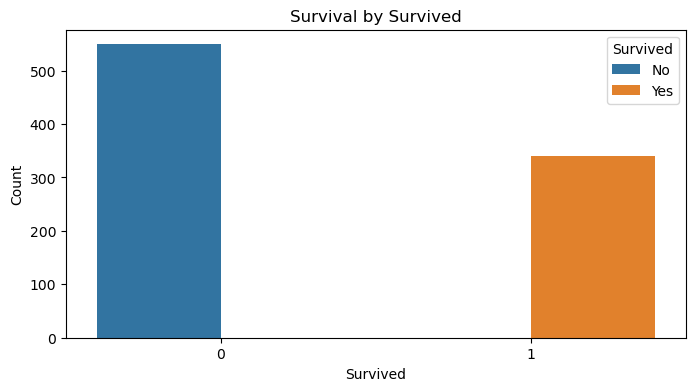

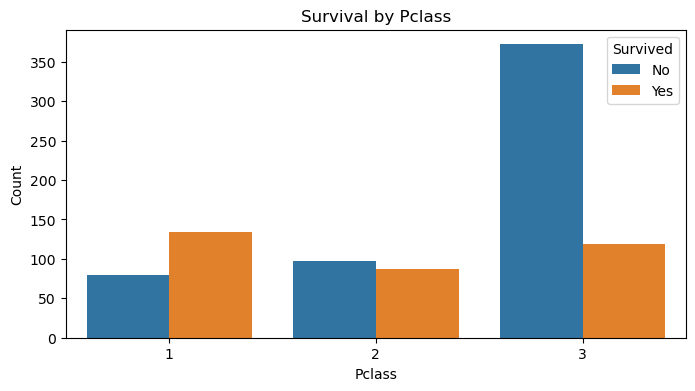

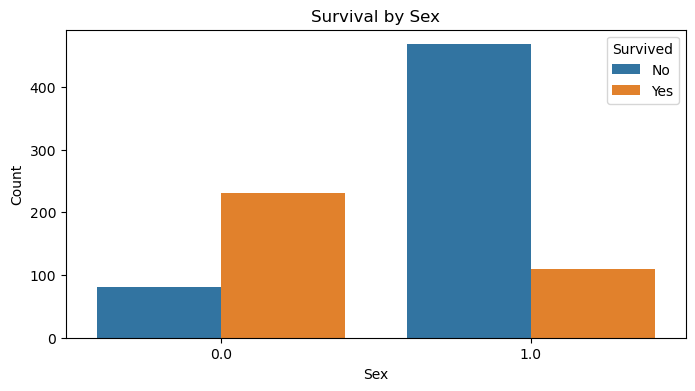

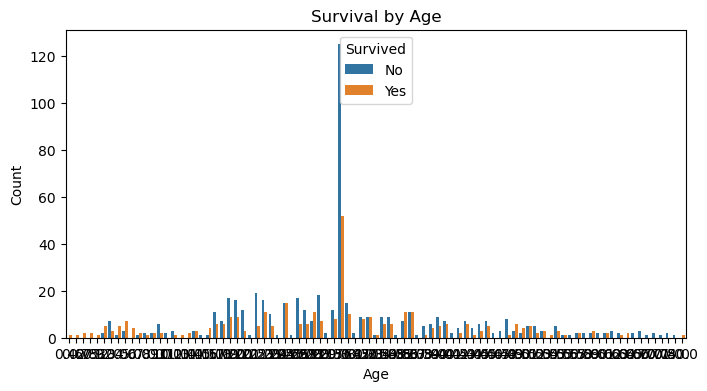

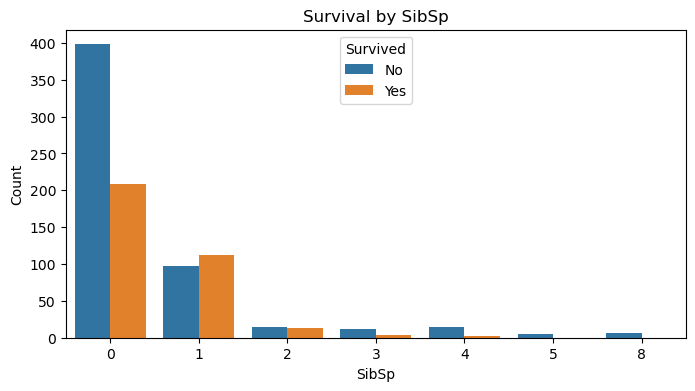

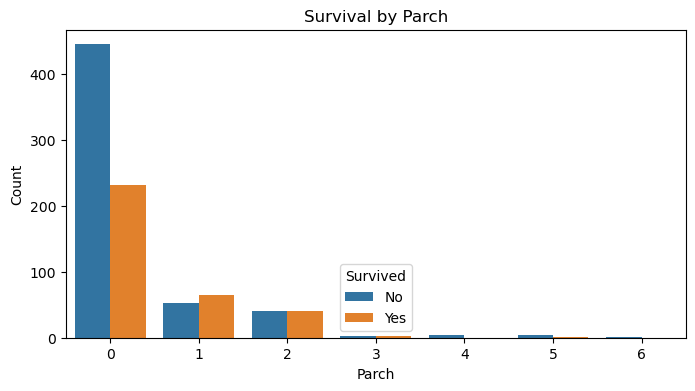

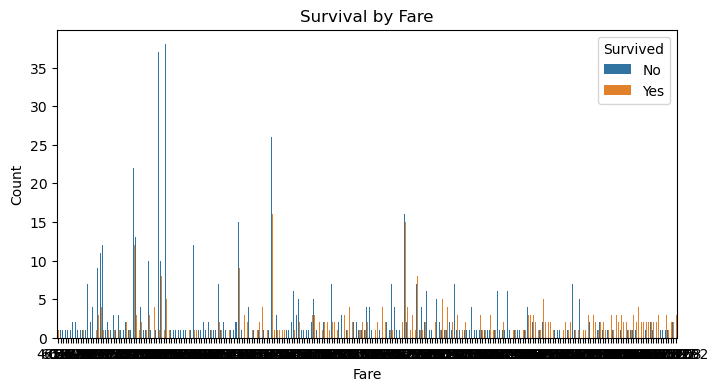

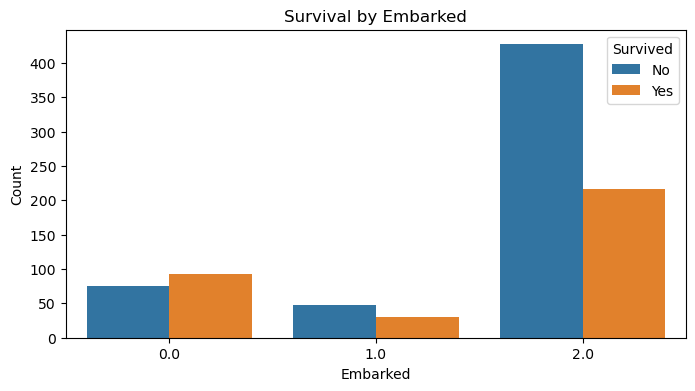

In [19]:
for col in data:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue='Survived')
    plt.title(f"Survival by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()

##### The number of deaths is more than that of the living , But there is no data imbalance problem

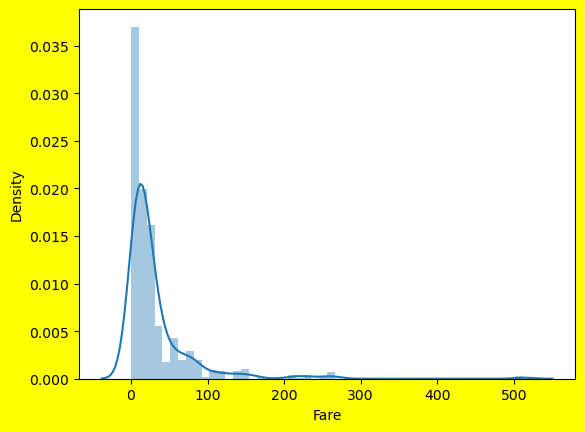

In [20]:
plt.figure(facecolor='yellow') 
sns.distplot(data['Fare']) 
plt.show()

#### There is lot of skewness present in fare column. we never removed skewness in categorical data

In [21]:
data.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
Embarked   -1.261367
dtype: float64

In [22]:
x = data.copy(deep = True)

In [23]:
x['Fare'] = np.cbrt(x['Fare'])

In [24]:
x.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        1.240647
Embarked   -1.261367
dtype: float64

In [25]:
x1 = data.copy(deep = True)
x1['Fare'] = np.log1p(x1['Fare'])
print(x1.skew())

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        0.400109
Embarked   -1.261367
dtype: float64


In [26]:
x2 = data.copy(deep = True)
x2['Fare'] = np.log(x2['Fare'])
print(x2.skew())

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare             NaN
Embarked   -1.261367
dtype: float64


##### Box-Cox transformation result is better so i will use box - cox

In [27]:
data['Fare'] = np.log1p(data['Fare'])

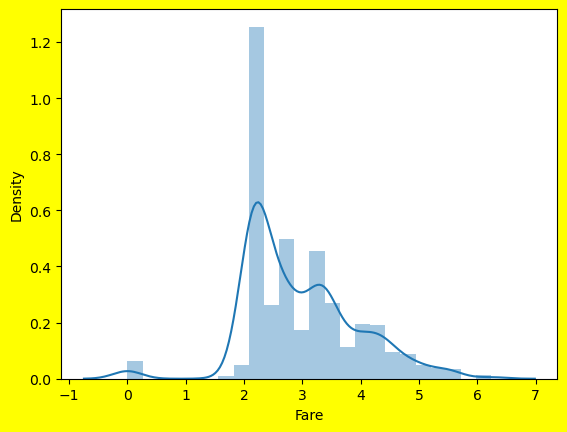

In [28]:
plt.figure(facecolor='yellow') 
sns.distplot(data['Fare']) 
plt.show()

##### now it is better

##### Let's plot heatmap to visualize and find the Correlation and multicollinearity

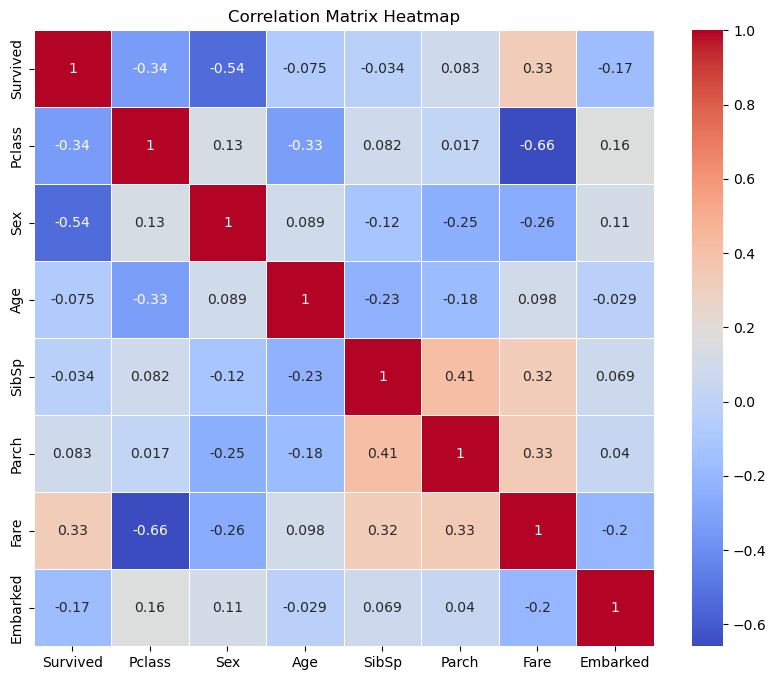

In [29]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


###### There is no multicollinearity problem present.
###### lable is negatively correlated with all features except Fare and parch and strong negative correlated with Sex

In [30]:
## Dividing dependent and independent variable
x = data.drop('Survived',axis = 1)
y = data['Survived']


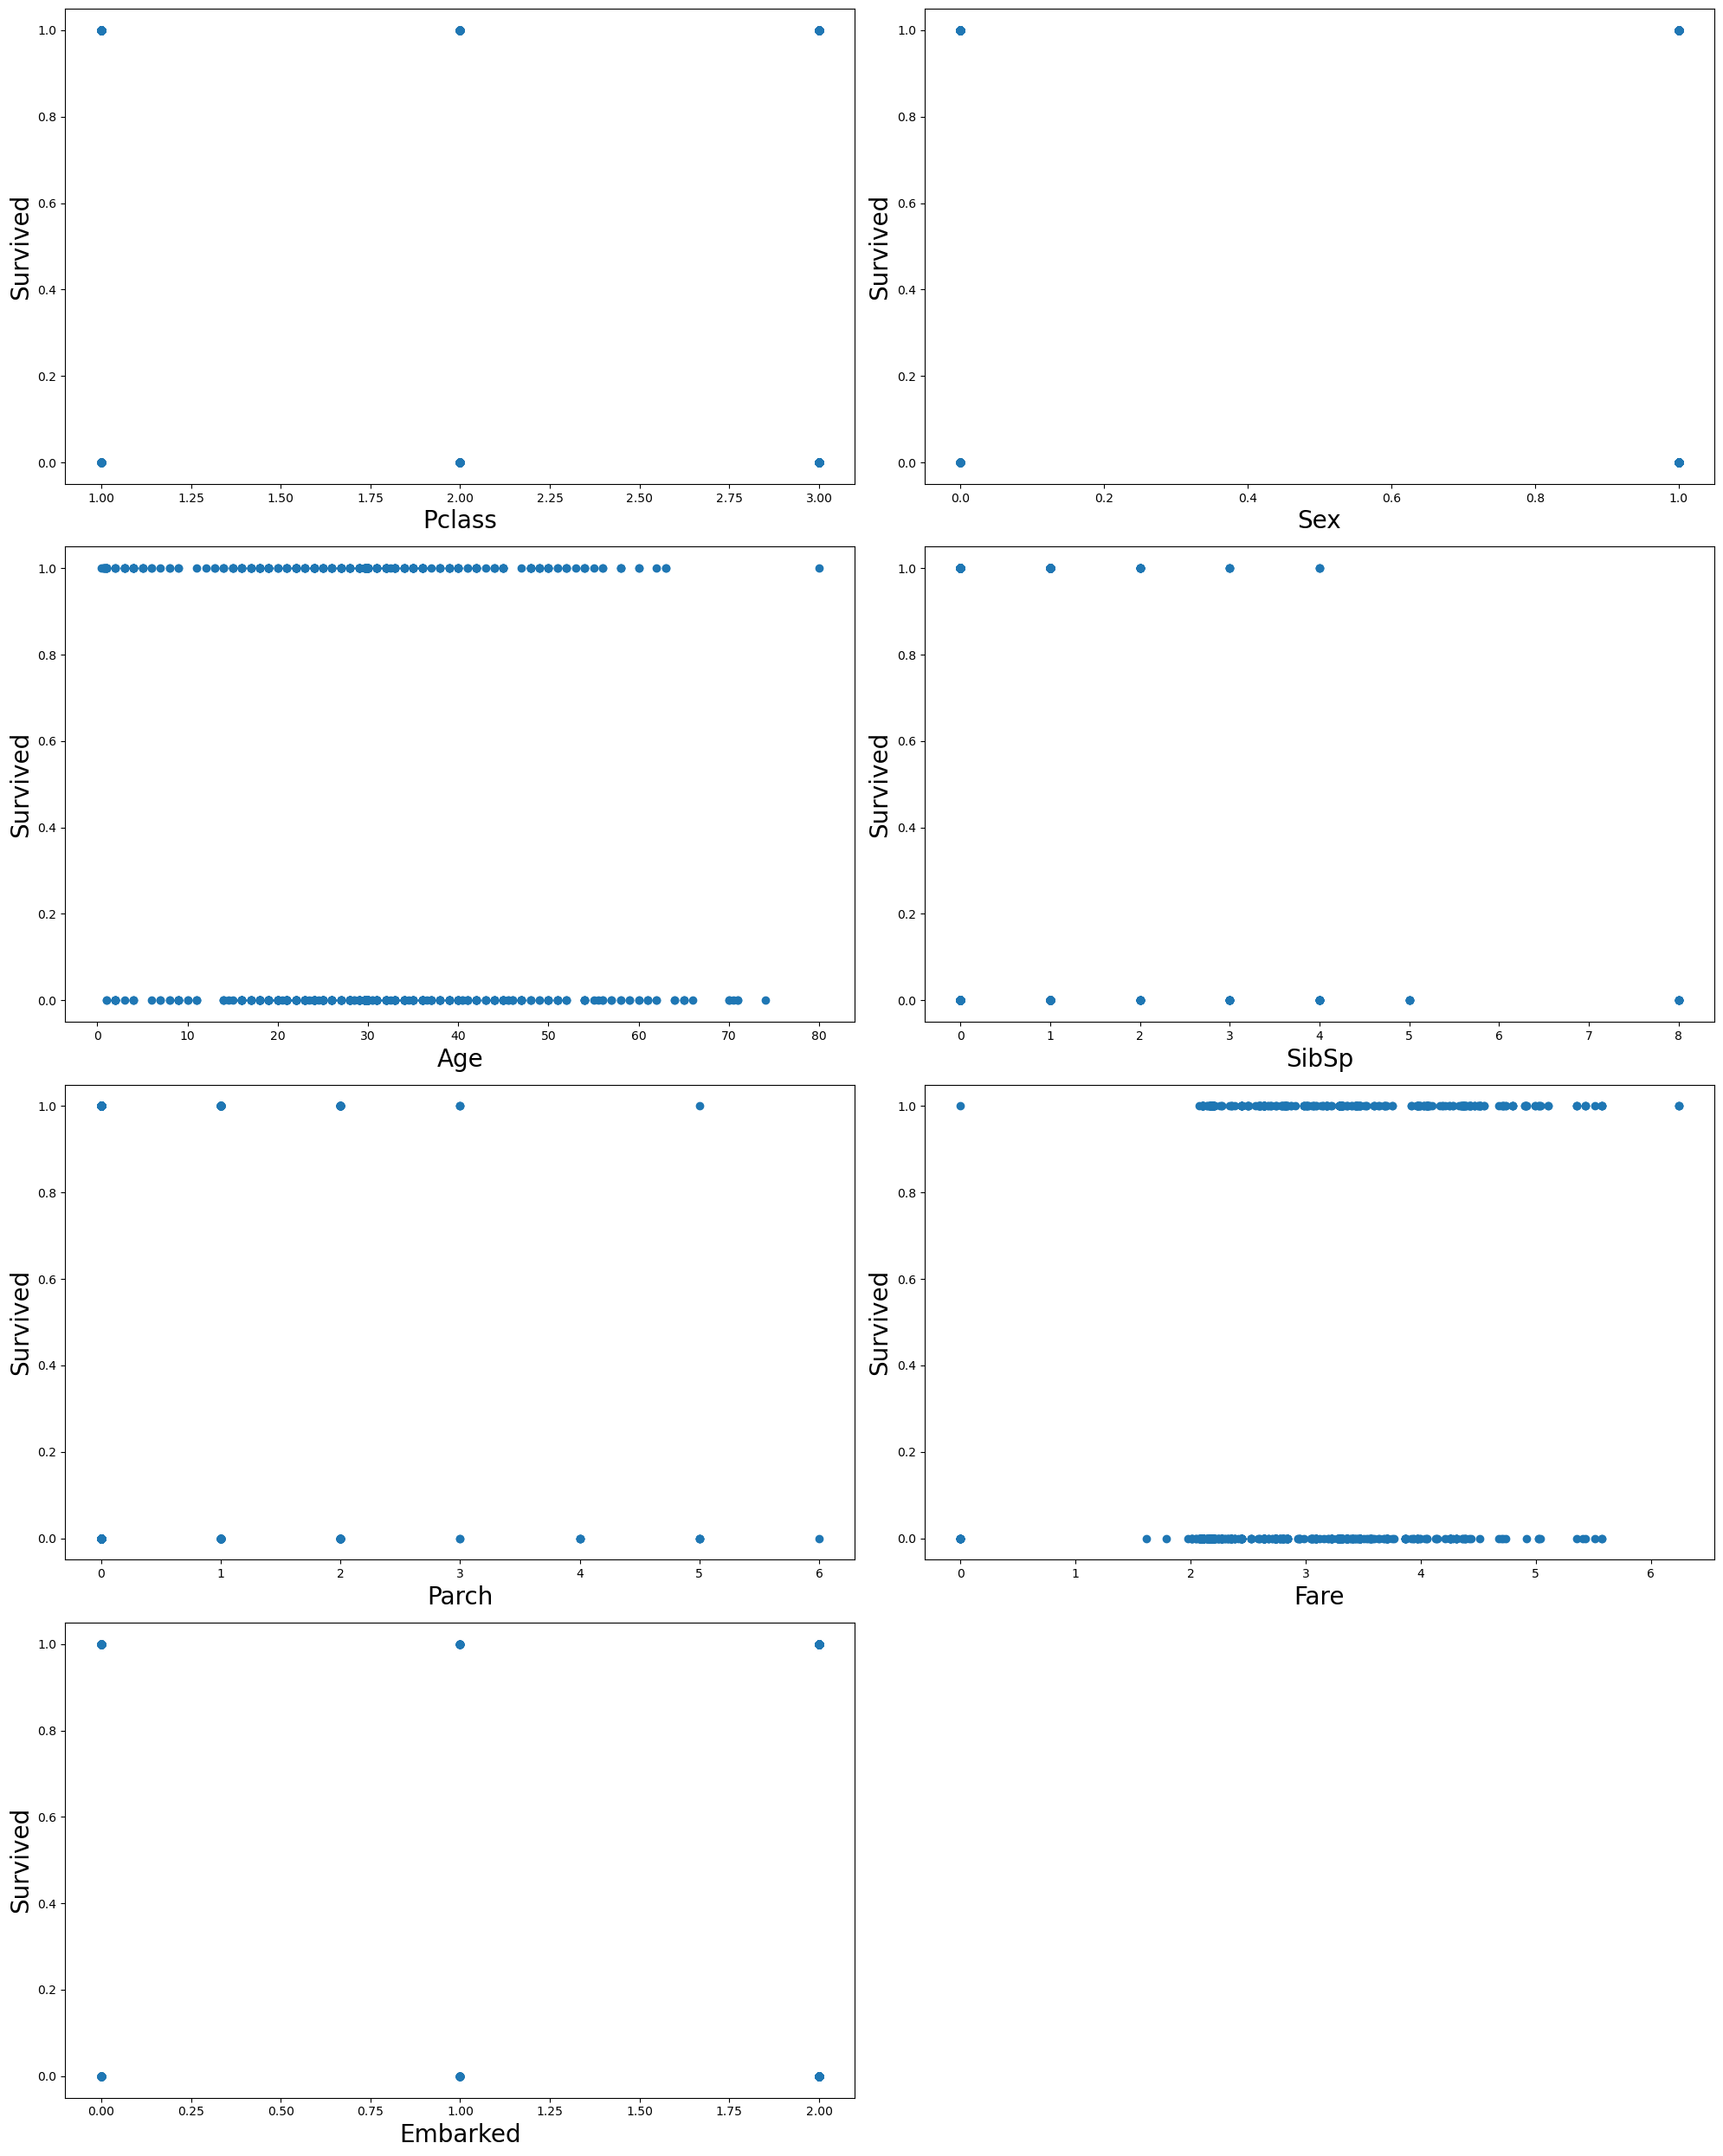

In [31]:
plt.figure(figsize=(20, 25))
plotnumber = 1

for column in x.columns:
    if plotnumber <= 8:
        plt.subplot(4, 2, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Survived", fontsize=20)
    
    plotnumber += 1

plt.tight_layout()  
plt.show()


In [32]:
#### Label dose not have good correlation with any feature except fare

In [33]:
## scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


#### Vif

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    

vif

,vif,Features
0,2.393560,Pclass
1,1.123948,Sex
2,1.201931,Age
3,1.473956,SibSp
4,1.404970,Parch
5,2.778959,Fare
6,1.081674,Embarked


#### No multicollinearity problem present 

In [36]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

###### Data is balance 

#### train_test_split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20, random_state= 41)

In [39]:
# Write a function and call as many as time to check accuracy_score of different models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

### DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Training and initiation name to modal
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True)        
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  98.31%

========================Test Result==========================
Accuracy Score:  77.53%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       109
           1       0.74      0.65      0.69        69

    accuracy                           0.78       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.77      0.78      0.77       178



### Hyperparameter tuning:

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_g    = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 5, 10, 15,20,25,30,40,50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
             }


In [45]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_g, cv=5, scoring='accuracy')

In [46]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [47]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [48]:
grid_search.best_score_

0.8185363931842806

In [49]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth=5,min_samples_leaf=2,
                             min_samples_split=10)
dtc.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=10)

In [50]:
# Call the function and pass dataset to check train and test score
metric_score(dtc,x_train,x_test,y_train,y_test, train=True)       
metric_score(dtc,x_train,x_test,y_train,y_test, train=False)       


========================Train Result======================

Accuracy Score:  84.39%

========================Test Result==========================
Accuracy Score:  82.02%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.82      0.68      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [51]:
#### after tuning result is better

In [60]:
import pickle

In [61]:
pickle.dump(dtc,open('Titanic_sur_p','wb'))